In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def conv2D(img,kernal):
    img_conv=np.zeros(np.array(img.shape))
    n=kernal.shape[0]
    for i in range(n//2,img.shape[0]-n//2):
        for j in range(n//2,img.shape[1]-n//2):
            pixel=0
            #print('image_point :',(i,j))
            for k in range(-(n//2),n//2+1):
                for m in range(-(n//2),n//2+1):
                    #print('neighbourhood :',(i+k,j+m))
                    #print(n//2+k,n//2+m)
                    pixel+=img[i+k][j+m]*kernal[n//2+k][n//2+m]
            img_conv[i][j]=pixel          
    return img_conv

def gaussian(sigma,n=0): #dont give n as an input (n is for generate DoG)
    if n==0:
        n=int((3*sigma)%2==0)+3*sigma
    kernal=np.zeros((n,n))
    for i in range(-(n//2),n//2+1):
        for j in range(-(n//2),n//2+1):
            val=np.exp(-(i**2+j**2)/(2*sigma**2))
            kernal[i+n//2][j+n//2]=val
    return (kernal)/np.sum(kernal)

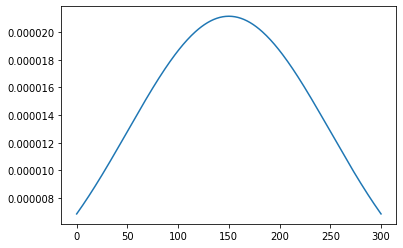

In [5]:
sigma=100
kernal=gaussian(sigma)
plt.plot(kernal[kernal.shape[0]//2+1])

In [11]:
col=cv2.imread('E:/ML_IP/image_processing/images/wonder.jpg')
img=cv2.cvtColor(col, cv2.COLOR_BGR2GRAY)

kernal=gaussian(1)
smoothed=conv2D(img,kernal)

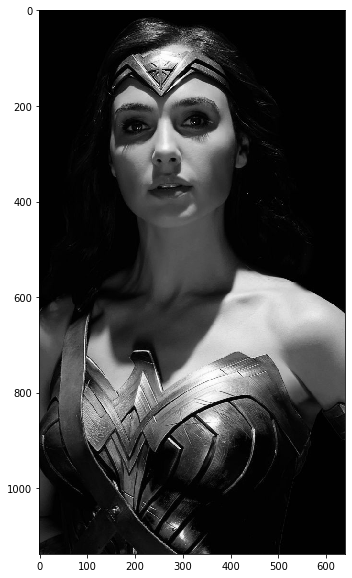

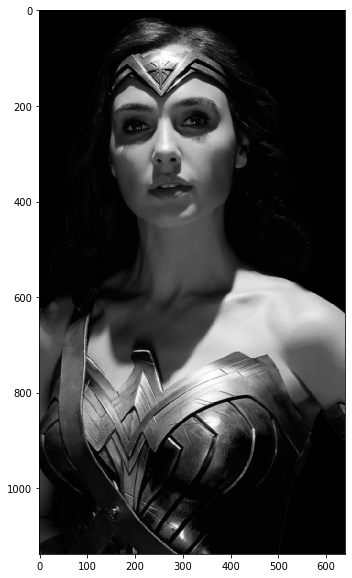

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.figure(figsize=(10,10))
plt.imshow(smoothed,cmap='gray')